## Библиотеки

In [1]:
import os
import random
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

from dataset import indexing
from dataset import preprocess_hist as prepr_hst
from dataset import normalization as norm
from dataset import sampling

## 1. Анализ исходной выборки

### 1.1. Описание данных

В качестве исходных данных представлен набор папок, каждая из которых содержит набор изображений автомобиля одной марки, модели, комплектации и пр., года, ракурса. Примеры наименований папок:

In [2]:
init_dataset_path = 'G:\\diplom\\project\\triplet_loss_project_2_06.04\\data\\015_model_marka_year_train'

In [3]:
rnd_folders = random.sample(os.listdir(init_dataset_path), 10)
for fld_n in rnd_folders:
    print(f'  {fld_n}')

  LADA GRANTA 2021_back
  MERCEDES-BENZ E300 4MATIS 2013_back
  SKODA SURERB 2014_back
  SUZUKI GRAND VI 2006
  AUDI A6 1998_back
  OPEL ZAFIRA 2010_back
  RENAULT LOGAN(SR) 2006_back
  TOYOTA CAMRY 2014
  SKODA SURERB 2019
  LADA KALINA 2008_back


Изображения имеют размер $256\times256$ или $128\times128$, имеют один канал. Примеры изображений:

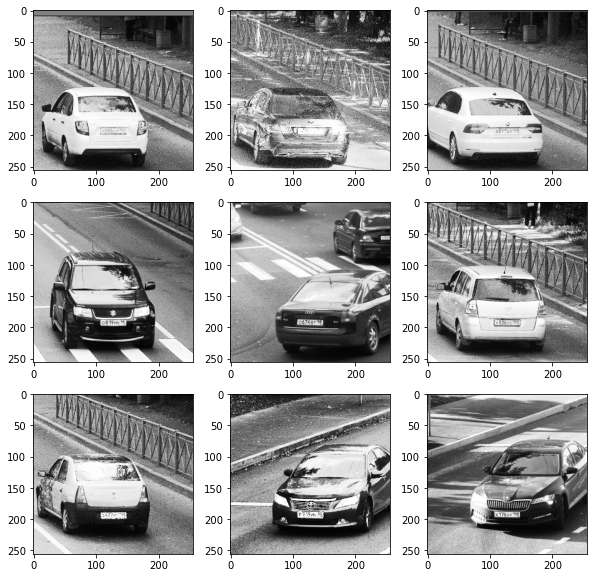

In [4]:
N_COLS = 3
N_ROWS = 3
fig = plt.figure(figsize=(10, 10))
grs = gs.GridSpec(N_ROWS, N_COLS, figure=fig)

images = []
for fld_n in rnd_folders:
    imgs_loc_path = os.path.join(init_dataset_path, fld_n)
    imgs_paths = os.listdir(imgs_loc_path)
    img_p = os.path.join(imgs_loc_path, random.choice(imgs_paths))
    images.append(img_p)
    
axs = []
for i in range(N_COLS*N_ROWS):
    axs.append(fig.add_subplot(grs[i]))
    axs[-1].imshow(Image.open(images[i]), 'gray')

plt.show()

Исходя из наименованя папок считается, что марка автомобиля $-$ это первое слово наименования папки, модель $-$ второе.

### 1.2. Анализ

In [5]:
folders = os.listdir(init_dataset_path)
indexes = indexing.get_indexes(folders)

In [6]:
indexes[0]

('1804_truck', 'WR', 'normal', 'truck')

In [7]:
marks_indx_f = lambda x: (x[0],)
models_indx_f = lambda x: (x[0], x[1])

**Марки**

In [8]:
mark_unique_data = prepr_hst.get_unique(indexes, marks_indx_f)
marks_t_indxs, marks_uniqie, marks_code_in = mark_unique_data

In [9]:
print(f'Общее число марок: {len(marks_uniqie)}')

Общее число марок: 156


In [10]:
marks_hist_data = prepr_hst.get_hist_data(init_dataset_path, folders,
                                          marks_t_indxs, marks_code_in)

  0%|          | 0/6151 [00:00<?, ?it/s]

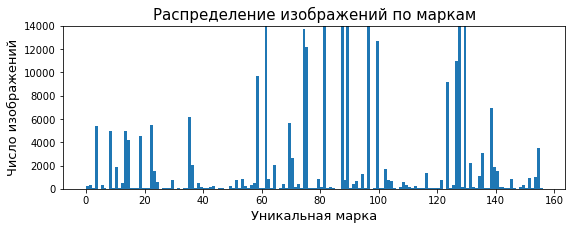

In [11]:
title = 'Распределение изображений по маркам'
xlabel = 'Уникальная марка'
prepr_hst.plot_hist(marks_hist_data, marks_uniqie,
                    title, xlabel, ylim=(0, 14000))

**Модели**

In [12]:
models_unique_data = prepr_hst.get_unique(indexes, models_indx_f)
models_t_indxs, models_uniqie, models_code_in = models_unique_data

In [13]:
print(f'Общее число моделей: {len(models_uniqie)}')

Общее число моделей: 1049


In [14]:
models_hist_data = prepr_hst.get_hist_data(init_dataset_path, folders,
                                           models_t_indxs, models_code_in)

  0%|          | 0/6151 [00:00<?, ?it/s]

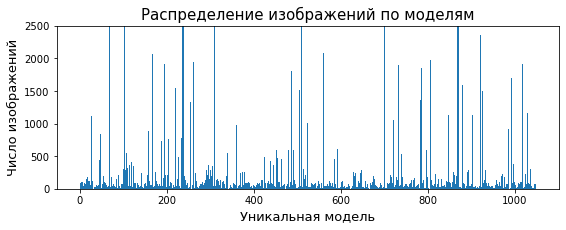

In [15]:
title = 'Распределение изображений по моделям'
xlabel = 'Уникальная модель'
prepr_hst.plot_hist(models_hist_data, models_uniqie,
                    title, xlabel, ylim=(0, 2500))

**Определение параметров нормализации изображений**

In [16]:
s='''
m, s = norm.get_normalize_params(train_dataset_path)
print(f'mean: {round(m, 3)}')
print(f'std: {round(s, 3)}')
'''

Вычисленные в последний раз:  
mean: $0,512$  
std: $0,272$

## 2. Семплирование исходной выборки для построения тренировочной

Исходная выборка сильно несбалансирована по числу изображений как по маркам, так и по моделям. Для построения тренировочной выборки будут отобраны марки, число изображений которых больше $1000$. Также ограничим число изображений сверху двумя тысячами.

In [17]:
init_dataset_path = 'G:\\diplom\\project\\triplet_loss_project_2_06.04\\data\\015_model_marka_year_train'
datasets_path = 'G:\\diplom\\project\\triplet_loss_project_2_06.04\\data'

In [73]:
s='''
_ = sampling.sample_data_by_marks(init_dataset_path, datasets_path,
                                  min_th=1000, max_th=2000, random_state=0)
'''

In [19]:
train_dataset_path = 'G:\\diplom\\project\\triplet_loss_project_2_06.04\\data\\sampled_train'

In [20]:
folders = os.listdir(train_dataset_path)
indexes = indexing.get_indexes(folders)

**Марки**

In [21]:
mark_unique_data = prepr_hst.get_unique(indexes, marks_indx_f)
marks_t_indxs, marks_uniqie, marks_code_in = mark_unique_data

In [22]:
print(len(marks_uniqie))

36


In [23]:
marks_hist_data = prepr_hst.get_hist_data(train_dataset_path, folders,
                                          marks_t_indxs, marks_code_in)

  0%|          | 0/4962 [00:00<?, ?it/s]

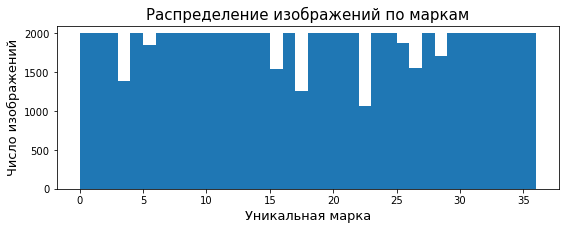

In [24]:
title = 'Распределение изображений по маркам'
xlabel = 'Уникальная марка'
prepr_hst.plot_hist(marks_hist_data, marks_uniqie, title, xlabel)

**Модели**

In [25]:
models_unique_data = prepr_hst.get_unique(indexes, models_indx_f)
models_t_indxs, models_uniqie, models_code_in = models_unique_data

In [26]:
print(len(models_uniqie))

744


In [28]:
models_hist_data = prepr_hst.get_hist_data(train_dataset_path, folders,
                                           models_t_indxs, models_code_in)

  0%|          | 0/4962 [00:00<?, ?it/s]

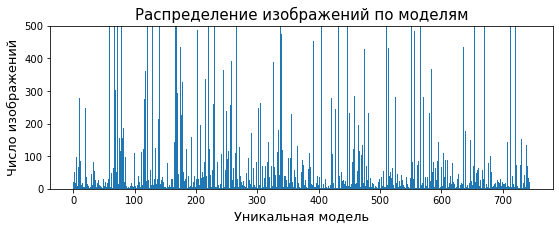

In [34]:
title = 'Распределение изображений по моделям'
xlabel = 'Уникальная модель'
prepr_hst.plot_hist(models_hist_data, models_uniqie, title,
                    xlabel, ylim=(0, 500))

До сих пор осталось достаточно большое колчество моделей, изображения в которых распределены сильно неравномерно. Отсеим часть моделей, оценив моду распределения числа изображений.

In [78]:
import os
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from collections import defaultdict
from typing import Tuple, Callable

In [110]:
# это в dataset/sampling
def imgs_distr_for_models(
    ds_path: str,
    xlim: Tuple[int, int] = None
) -> None:
    distr_data = get_imgs_distr_m_data(ds_path)
    plot_distr_m(distr_data, xlim=xlim)

In [111]:
# это в dataset/sampling
def get_imgs_distr_m_data(ds_path: str) -> list:
    def indx_f(indx):
        return (indx[0], indx[1])
    
    folders = os.listdir(ds_path)
    indexes = [indx_f(indx) for indx in indexing.get_indexes(folders)]
    counter = defaultdict(int)
    iterator = tqdm(zip(folders, indexes), total=len(folders))
    for fold, indx in iterator:
        imgs_loc_path = os.path.join(ds_path, fold)
        imgs_len = len(os.listdir(imgs_loc_path))
        counter[indx] += imgs_len
    res = list(counter.values())
    return res

In [124]:
# это в dataset/sampling
def plot_distr_m(distr_data: list, xlim: Tuple[int, int] = None):
    bins = range(max(distr_data) + 1)
    median = np.median(distr_data).round(2)
    fig, ax = plt.subplots(figsize=(9, 4))
    ax.hist(distr_data, bins=bins, label=f'median: {median}')
    if xlim is not None:
        ax.set_xlim(*xlim)
    ax.set_title('Распределение по числу изображений', fontsize=15)
    ax.set_xlabel('Число изображений', fontsize=13)
    ax.set_ylabel('Частота', fontsize=13)
    plt.legend(fontsize=13)
    plt.show()

  0%|          | 0/4962 [00:00<?, ?it/s]

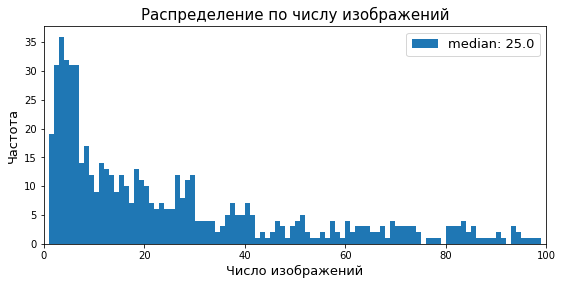

In [125]:
imgs_distr_for_models(train_dataset_path, (0, 100))

Отсеим все модели, число изображений которых меньше $25$, и ограничим число изображений сверху числом $40$.

In [72]:
len(list(filter(lambda x: x[1] > 25, cointer.items())))

369

## 3. Анализ тестовой выборки

Тестовая выборка была сформирована вручную. Было отобрано $22$ марки, $3$ из которых лежат за пределами тренировочной выборки. Эти три марки необходимы для оценки способности определения новых объектов в системе.

In [1]:
test_dataset_path = 'G:\\diplom\\project\\triplet_loss_project_2_06.04\\data\\015_model_marka_year_test'

In [27]:
folders = os.listdir(test_dataset_path)
indexes = indexing.get_indexes(folders)

**Марки**

In [28]:
mark_unique_data = prepr_hst.get_unique(indexes, marks_indx_f)
marks_t_indxs, marks_uniqie, marks_code_in = mark_unique_data

In [29]:
print(len(marks_uniqie))

22


In [30]:
marks_hist_data = prepr_hst.get_hist_data(test_dataset_path, folders,
                                          marks_t_indxs, marks_code_in)

  0%|          | 0/541 [00:00<?, ?it/s]

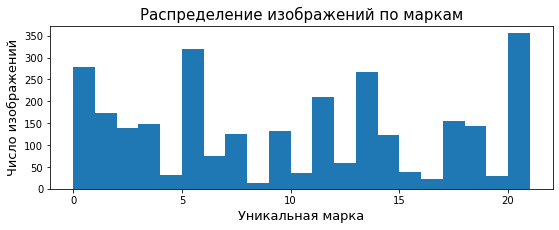

In [31]:
title = 'Распределение изображений по маркам'
xlabel = 'Уникальная марка'
prepr_hst.plot_hist(marks_hist_data, marks_uniqie, title, xlabel)

**Модели**

In [32]:
models_unique_data = prepr_hst.get_unique(indexes, models_indx_f)
models_t_indxs, models_uniqie, models_code_in = models_unique_data

In [33]:
print(len(models_uniqie))

82


In [34]:
models_hist_data = prepr_hst.get_hist_data(test_dataset_path, folders,
                                           models_t_indxs, models_code_in)

  0%|          | 0/541 [00:00<?, ?it/s]

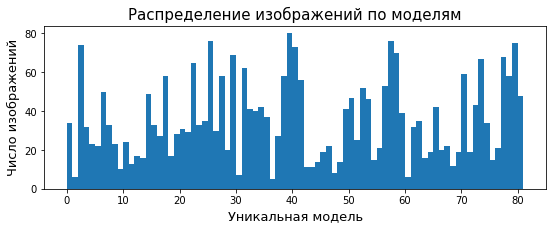

In [35]:
title = 'Распределение изображений по моделям'
xlabel = 'Уникальная модель'
prepr_hst.plot_hist(models_hist_data, models_uniqie, title, xlabel)

Ввиду недостаточной равномерности тестовой выборки как по маркам, так и по моделям, в качестве кретерия качества будет использоваться **AUC**.